# Ecometrics

Name: Poorva
</br>
Date: 4/25/24

In [20]:
#Load in necessary libraries
library(DBI)
library(RMariaDB)
library(RSQLite)
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [13]:
#Connecting to database
localuserpassword <- "DSSA2003*" 
localport <- 3306 
dbname <- "warehousing" 

#Connect to the server using MariaDB()
con <- dbConnect(RMariaDB::MariaDB(), 
                 host = 'localhost',
                 user = 'root',
                 password = localuserpassword,
                 port = localport)
dbExecute(con, paste("USE", dbname))

[1] 0

In [11]:
#Preview the dataframe. 
food <- read.csv("cleaned_food.csv")
colnames(food)

[1] "food_product"                        "land_use_change"                    
 [3] "animal_feed"                         "farm"                               
 [5] "processing"                          "transport"                          
 [7] "packging"                            "retail"                             
 [9] "total_emissions"                     "eutrophying_emissions_1000kcal"     
[11] "eutrophying_emissions_kilogram"      "eutrophying_emissions_100gprotein"  
[13] "eutrophying_emissions_total"         "freshwater_withdrawals_1000kcal"    
[15] "freshwater_withdrawals_100gprotein"  "freshwater_withdrawals_kilogram"    
[17] "freshwater_withdrawals_total"        "greenhouse_emissions_1000kcal"      
[19] "greenhouse_emissions_100gprotein"    "greenhouse_emissions_total"         
[21] "land_use_1000kcal"                   "land_use_kilogram"                  
[23] "land_use_100gprotein"                "land_use_total"                     
[25] "scarcity_weighted_water_kilogram"    "scarcity_weighted_water_100gprotein"
[27] "scarcity_weighted_water_1000kcal"    "scarcity_weighted_water_total"

In [ ]:
#Create our first table
first_table_query <- "CREATE TABLE food_data (
                      food_product CHAR(30) PRIMARY KEY,
                      total_emissions DECIMAL(3,1)
                                              );"
#Execute the query:
dbExecute(con, first_table_query)

In [ ]:
#Table name
table_name <- "food_data"

#Write a query that will show the column names from the table
query <- paste("SHOW COLUMNS FROM", table_name)

#Get the query and retrieve the column/field names from the database(con)
db_columns <- dbGetQuery(con, query)$Field

#Define the common columns between the CSV data (Column names) and the database (Table fields)
common_columns <- intersect(colnames(food), db_columns)

#These are the ONLY columns that we will transfer into the table.
common_columns

In [ ]:
#Create a subset of the original .csv data with only the specified column names.
food_data_subset <- food[, common_columns]

In [ ]:
#Populate table
dbWriteTable(con,"food_data", food_data_subset, append = TRUE, row.names = FALSE)

In [ ]:
#Create second table
second_table_query <- "CREATE TABLE Emissions (
                      food_product CHAR(30),
                      land_use_change DECIMAL(3,1),
                      animal_feed DECIMAL (3,1),
                      farm DECIMAL (3,1),
                      processing DECIMAL (3,1),
                      transport DECIMAL (3,1),
                      packaging DECIMAL (3,1),
                      retail DECIMAL (3,1),
                      greenhouse_emissions_1000kcal DECIMAL (8,3),
                      greenhouse_emissions_100gprotein DECIMAL (8,3),
                      greenhouse_emissions_total DECIMAL (8,3),
                      eutrophying_emissions_1000kcal DECIMAL (8,3),
                      eutrophying_emissions_kilogram DECIMAL (8,3),
                      eutrophying_emissions_100gprotein DECIMAL (8,3),
                      eutrophying_emissions_total DECIMAL (8,3),
                      FOREIGN KEY (food_product) REFERENCES food_data(food_product)
                                              );"
#Execute the query:
dbExecute(con, second_table_query)

In [ ]:
#Create third table
third_table_query <- "CREATE TABLE Water_usage (
                      food_product CHAR(30),
                      freshwater_withdrawals_1000kcal DECIMAL (8,3),
                      freshwater_withdrawals_100gprotein DECIMAL (8,3),                     
                      freshwater_withdrawals_kilogram DECIMAL (8,3),
                      freshwater_withdrawals_total DECIMAL (8,3),
                      scarcity_weighted_water_kilogram DECIMAL (10,3),
                      scarcity_weighted_water_100gprotein DECIMAL (10,3),
                      scarcity_weighted_water_1000kcal DECIMAL (10,3),
                      scarcity_weighted_water_total DECIMAL (10,3),
                      FOREIGN KEY (food_product) REFERENCES food_data(food_product)
                                              );"
#Execute the query:
dbExecute(con, third_table_query)

In [ ]:
#Create fourth table
fourth_table_query <- "CREATE TABLE Land_use (
                      food_product CHAR(30),
                      land_use_1000kcal DECIMAL (8,3),
                      land_use_kilogram DECIMAL (8,3), 
                      land_use_100gprotein DECIMAL (8,3),
                      land_use_total DECIMAL (8,3),
                      FOREIGN KEY (food_product) REFERENCES food_data(food_product)
                                              );"
#Execute the query:
dbExecute(con, fourth_table_query)

In [ ]:
#Table2
table2 <- "Emissions"

#Write a query that will show the column names from the table we created
query <- paste("SHOW COLUMNS FROM", table2)

#Get the query and retrieve the column/field names from the database(con)
db_columns2 <- dbGetQuery(con, query)$Field

#Define the common columns between the CSV data (Column names) and the database (Table fields)
common_columns2 <- intersect(colnames(food), db_columns2)

##Table 3
table3 <- "Water_usage"
query <- paste("SHOW COLUMNS FROM", table3)
db_columns3 <- dbGetQuery(con, query)$Field
common_columns3 <- intersect(colnames(food), db_columns3)

###Table 4
table4 <- "Land_use"
query <- paste("SHOW COLUMNS FROM", table4)
db_columns4 <- dbGetQuery(con, query)$Field
common_columns4 <- intersect(colnames(food), db_columns4)

In [ ]:
#Create subsets of the original .csv data with only the specified column names.
food_data_subset2 <- food[, common_columns2]
food_data_subset3 <- food[, common_columns3]
food_data_subset4 <- food[, common_columns4]

In [ ]:
#populate table via df
dbWriteTable(con,"Emissions", food_data_subset2, append = TRUE, row.names = FALSE)
dbWriteTable(con,"Water_usage", food_data_subset3, append = TRUE, row.names = FALSE)
dbWriteTable(con,"Land_use", food_data_subset4, append = TRUE, row.names = FALSE)

In [14]:
#Example analysis 1
## What food product has the highest transport emissions and water withdrawls? 
analysis <- dbGetQuery(con, "SELECT 
                           food_data.food_product,
                           food_data.total_emissions,
                           Water_usage.freshwater_withdrawals_kilogram,
                           Emissions.transport
                         FROM 
                           food_data 
                         LEFT JOIN 
                           Water_usage ON food_data.food_product = Water_usage.food_product
                         LEFT JOIN 
                           Emissions ON food_data.food_product = Emissions.food_product
                         ORDER BY 
                           Emissions.transport DESC,
                           Water_usage.freshwater_withdrawals_kilogram DESC
                         LIMIT 1
                                ")
analysis

food_product,total_emissions,freshwater_withdrawals_kilogram,transport
<chr>,<dbl>,<dbl>,<dbl>
Cane Sugar,2.6,620.1,0.8


food_product,land_use_total,greenhouse_emissions_total,eutrophying_emissions_total,freshwater_withdrawals_total,scarcity_weighted_water_total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lamb and Mutton,671.282,32.38,176.311,3272.456,257623.3


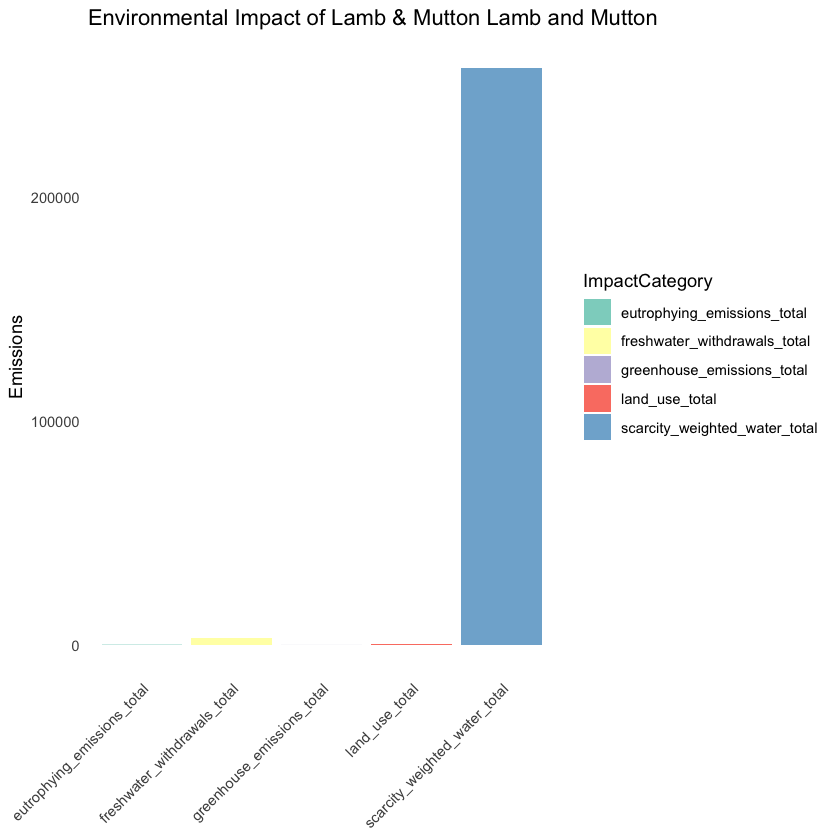

In [30]:
#Example Analysis 2
highestImpactQuery <- dbGetQuery(con, "
  SELECT      
    food_data.food_product, 
    Land_use.land_use_total,
    Emissions.greenhouse_emissions_total,
    Emissions.eutrophying_emissions_total,
    Water_usage.freshwater_withdrawals_total,
    Water_usage.scarcity_weighted_water_total
  FROM 
    food_data
  LEFT JOIN 
    Land_use ON food_data.food_product = Land_use.food_product
  LEFT JOIN 
    Emissions ON food_data.food_product = Emissions.food_product
  LEFT JOIN 
    Water_usage ON food_data.food_product = Water_usage.food_product
  ORDER BY 
    Land_use.land_use_total DESC,
    Emissions.greenhouse_emissions_total DESC,
    Emissions.eutrophying_emissions_total DESC,
    Water_usage.freshwater_withdrawals_total DESC,
    Water_usage.scarcity_weighted_water_total DESC
  LIMIT 1
")
highestImpactQuery


##Example Analysis 2 Graph

#Get rid of scientific notaion
options(scipen = 999)

#Convert value
highestImpactLong <- highestImpactQuery %>%
  pivot_longer(cols = -food_product, names_to = "ImpactCategory", values_to = "Value")

# Now, create the bar chart using ggplot2
ggplot(highestImpactLong, aes(x = ImpactCategory, y = Value, fill = ImpactCategory)) +
  geom_col() +  
  theme_minimal() +
  labs(title = paste("Environmental Impact of Lamb & Mutton", highestImpactQuery$food_product),
       x = NULL , #x label
       y = "Emissions" ) +    
  scale_fill_brewer(palette = "Set3") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for readability
        panel.grid.major = element_blank(),                 # Removes major gridlines
        panel.grid.minor = element_blank())                 # Removes minor gridlines


food_product,land_use_total
<chr>,<dbl>
Lamb and Mutton,671.282
Beef (beef herd),609.297
Dark Chocolate,220.218
Cheese,150.235
Coffee,87.252


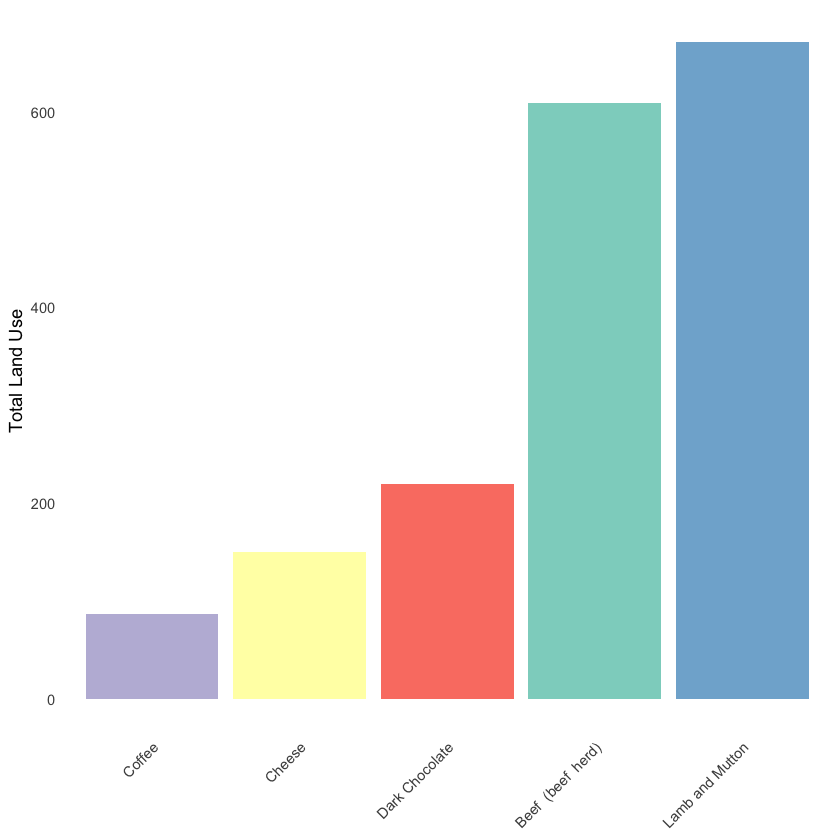

In [23]:
#Example Analysis 3
land <- dbGetQuery(con, "SELECT 
                             food_product,
                             land_use_total
                           FROM 
                             Land_use
                           ORDER BY 
                             land_use_total DESC
                           LIMIT 5
                          ")
land

##Example Analysis 3 Graph

ggplot(land, aes(x = reorder(food_product, land_use_total), y = land_use_total, fill = food_product)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = NULL,
       x = NULL,
       y = "Total Land Use") +
  scale_fill_brewer(palette = "Set3") +
  theme(
    legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

In [ ]:
#Close the database connection 
dbDisconnect(con)